In [24]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

salary_data = pd.read_csv('salary.csv')

# Remove Nan values
salary_data.dropna(how='any',axis=0)

salary_data.shape

lm = smf.ols(formula='salary ~ yearsworked', data=salary_data).fit() 

lm.params

Intercept      40115.013788
yearsworked      837.331790
dtype: float64

In [2]:
pre_df = pd.DataFrame({'yearsworked': [12]})
pre_df.head()


,yearsworked
0,12


In [3]:
lm.predict(pre_df)

0    50162.995268
dtype: float64

In [4]:

# create a DataFrame with the minimum and maximum values of TV
pre_df = pd.DataFrame({'yearsworked': [salary_data.yearsworked.min(), salary_data.yearsworked.max()]})
pre_df.head()

,yearsworked
0,0
1,41


In [5]:
predictions = lm.predict(pre_df)
predictions

0    40115.013788
1    74445.617178
dtype: float64

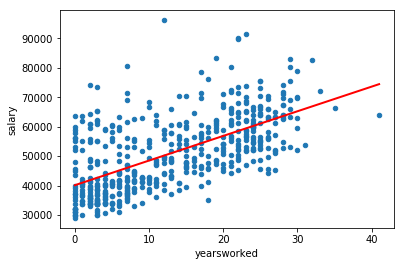

In [6]:
salary_data.plot(kind='scatter', x='yearsworked', y='salary')
plt.plot(pre_df, predictions, c='red', linewidth=2)

In [7]:

# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,38661.504478,41568.523097
yearsworked,746.102144,928.561436


In [8]:
# print the p-values for the model coefficients
lm.pvalues

Intercept      4.381691e-214
yearsworked     1.287335e-56
dtype: float64

In [9]:
# print the R-squared value for the model
lm.rsquared

0.38886307349960003

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     325.1
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.29e-56
Time:                        11:30:59   Log-Likelihood:                -5448.0
No. Observations:                 513   AIC:                         1.090e+04
Df Residuals:                     511   BIC:                         1.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.012e+04    739.844     54.221      0.000    3.87e+04    4.16e+04
yearsworked   837.3318     46.436     18.032      0.000     746.102     928.561
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.239
Skew:                           1.047   Prob(JB):                     2.86e-27
Kurtosis:                       4.153   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""